<a href="https://colab.research.google.com/github/kirubanath/ML-DS_learnings/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to design a system that can help a visually impaired person
know what is around them. At present, they use a “white cane” that
is used to tap and feel is there is an obstacle. We want to use machine learning to make life slightly better for them. However, given the
limitation of time we will consider a subset, though a core part of the
problem.

The posture we will adopt is that the mobile phone camera can acquire
images at some periodic intervals or when the individual wants to know
what is in the field of view of where the camera is being pointed. Assume that there are only 10 objects that are there in the world (there
is no class which is “everything else”) and the field of view may contain
one of those 10 objects.

The image is fed into a network that you have to design that can
recognize what the object is. Hopefully, a speech synthesizer can then
announce it to the individual but we will not concern ourselves with
the speech synthesis part.

Use the CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.
html. This dataset has 10 objects and each image has an object. In
a real system we will have to contend with segmentation problem but
let us assume that step has been done for us.

Design a FCNN using
 
*   a single layer **(7 points)**

*   multiple layers in lower dimension, and **(7 points)**

*   a deep FCNN **(7 points)**


that can recognize the object (the category can be fed into a speech synthesizer
that can announce the object in the filed of view but that is not part of
the scope). Report the 5-fold cross validation accuracy for the third deep FCNN  and comment
on some practical difficulties that you may face in implement this on a
mobile phone **(4 points)**

In [ ]:
#importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import codecs

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import initializers
from sklearn.model_selection import KFold

#importing the CIFAR10 dataset
from tensorflow.keras.datasets import cifar10

#setting the random seed:
tf.random.set_seed(42)

In [ ]:
#loading the train and test data
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data() 

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Vizualizing the data**

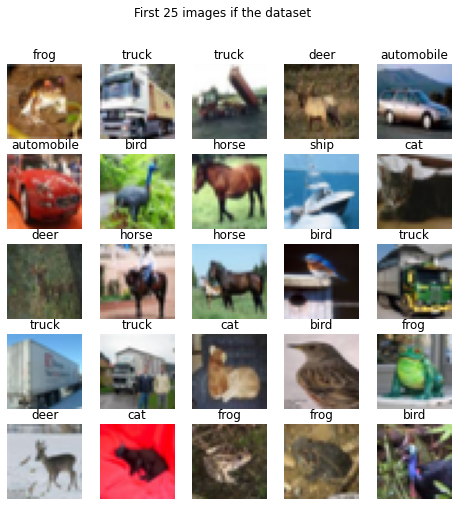

In [ ]:
fig,ax = plt.subplots(5,5,figsize = (8,8))
fig.suptitle('First 25 images if the dataset')
count = 0
for i in range(5):
  for j in range(5):
    ax[i,j].set_title(labels[Y_train[count][0]])
    ax[i,j].axis('off')
    ax[i,j].imshow(X_train[count])
    count+=1


**Normalizing the input**

In [ ]:
X_train = X_train/255
X_test = X_test/255

**Reshaping the input (Flatten)**

We could also do the same thing with Flatten of tensorflow (add flatten as a layer inside)

In [ ]:
X_train = X_train.reshape(50000,-1)
X_test = X_test.reshape(10000,-1)

In [ ]:
#this is needed if we want to one hot encode the output
# Y_train = to_categorical(Y_train)
# Y_test = to_categorical(Y_test)

## Single Layer FCNN

In [ ]:
#defining the model:
model1 = Sequential()
model1.add(Input(shape = [3072,]))
#model1.add(Flatten(input_shape = (32,32,3)))
model1.add(Dense(10,activation = 'softmax'))

In [ ]:
#compiling the model:
model1.compile(
    optimizer = 'sgd',                              #other popular one is adam
    loss      = 'sparse_categorical_crossentropy',  #if onehot encoded ->'categorical_crossentropy'
    metrics   = ['accuracy'] 
)

In [ ]:
#Summary of the model:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hs1 = model1.fit(X_train,Y_train, epochs = 15, validation_data = (X_test,Y_test), batch_size = 200)

Epoch 1/15
250/250 [==============================] - 3s 4ms/step - loss: 2.0500 - accuracy: 0.2667 - val_loss: 1.9313 - val_accuracy: 0.3323
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 1.9035 - accuracy: 0.3344 - val_loss: 1.8695 - val_accuracy: 0.3511
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 1.8588 - accuracy: 0.3542 - val_loss: 1.8464 - val_accuracy: 0.3680
Epoch 4/15
250/250 [==============================] - 1s 3ms/step - loss: 1.8342 - accuracy: 0.3646 - val_loss: 1.8306 - val_accuracy: 0.3657
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 1.8168 - accuracy: 0.3719 - val_loss: 1.8106 - val_accuracy: 0.3727
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 1.8046 - accuracy: 0.3745 - val_loss: 1.8065 - val_accuracy: 0.3717
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - loss: 1.7949 - accuracy: 0.3800 - val_loss: 1.7907 - val_accuracy: 0.3803
Epoch 

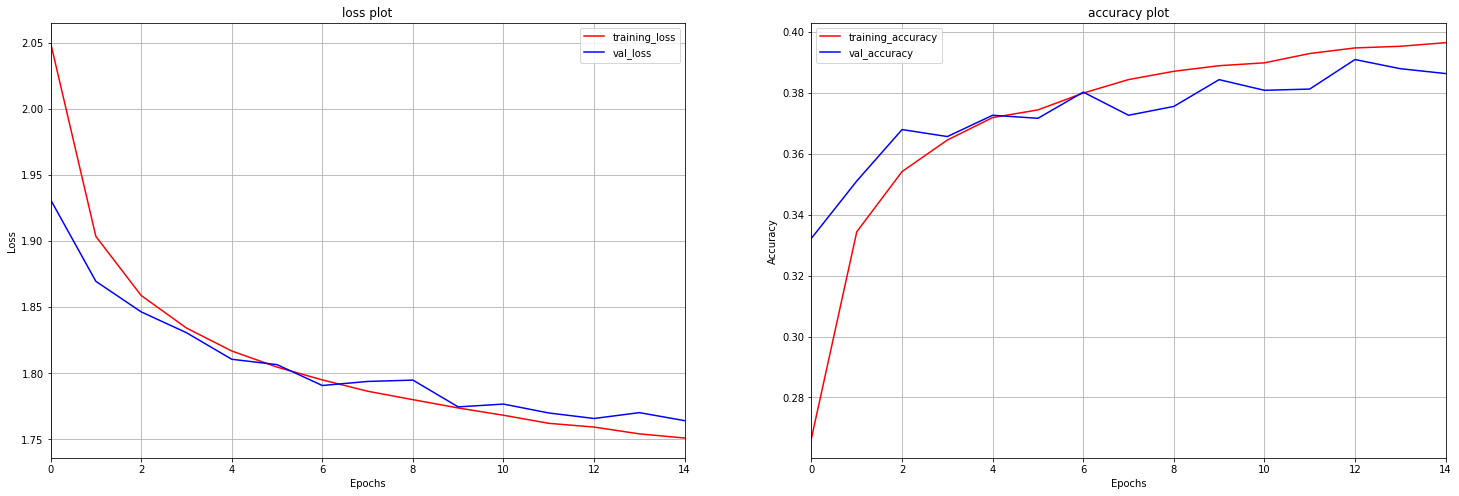

In [ ]:
#hs1.history has the model history:
df1 = pd.DataFrame(hs1.history) 

#vizualising:
df1.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)
fig,ax = plt.subplots(1,2,figsize = (25,8))
df1[['training_loss', 'val_loss']].plot(ax= ax[0],xlim = [0,14],grid = True, title = 'loss plot', xlabel = 'Epochs', ylabel = 'Loss', style = ['r','b']);
df1[['training_accuracy', 'val_accuracy']].plot(ax= ax[1],xlim = [0,14],grid = True, title = 'accuracy plot', xlabel = 'Epochs', ylabel = 'Accuracy', style = ['r','b']);


In [ ]:
model1.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7641 - accuracy: 0.3864


[1.7641369104385376, 0.3864000141620636]

As we can see above the model was able to acheive an accuracy of 35.6% with a test loss of 1.90 after training for 15 epochs.

In [ ]:
#visualizing the first 5 predictions:
y_pred = model1.predict(X_test[:5])
y_pred = y_pred.argmax(axis = -1)


1/1 [==============================] - 0s 55ms/step


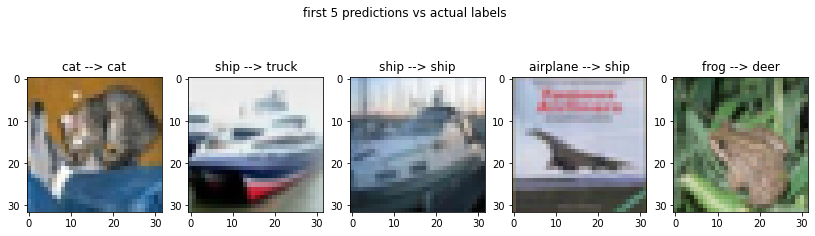

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (14,4))
fig.suptitle('first 5 predictions vs actual labels')
for i in range(5):
  ax[i].imshow(X_test[i].reshape(32,32,3))
  ax[i].set_title(f'{labels[Y_test[i][0]]} --> {labels[y_pred[i]]}')
plt.show()

A random guess here would be 10% accurate since there are 10 classes. So our model with 36% accuracy is slightly better. 

## Multilayer FCNN - (2 hidden layers)

In [ ]:
model2 = Sequential([
    Dense(500,input_dim = 3072 , activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(100, activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(10,activation = 'softmax', kernel_initializer = initializers.GlorotNormal())
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               1536500   
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,587,610
Trainable params: 1,587,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [ ]:
#training:
hs2 = model2.fit(X_train,Y_train, epochs = 15, batch_size = 200 , validation_data = (X_test,Y_test))

Epoch 1/15
250/250 [==============================] - 2s 5ms/step - loss: 1.9923 - accuracy: 0.2905 - val_loss: 1.8102 - val_accuracy: 0.3554
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 1.7812 - accuracy: 0.3657 - val_loss: 1.7649 - val_accuracy: 0.3617
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 1.6885 - accuracy: 0.3980 - val_loss: 1.6586 - val_accuracy: 0.4097
Epoch 4/15
250/250 [==============================] - 1s 3ms/step - loss: 1.6371 - accuracy: 0.4184 - val_loss: 1.6235 - val_accuracy: 0.4189
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5844 - accuracy: 0.4378 - val_loss: 1.6022 - val_accuracy: 0.4305
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5452 - accuracy: 0.4497 - val_loss: 1.5456 - val_accuracy: 0.4472
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5079 - accuracy: 0.4651 - val_loss: 1.5362 - val_accuracy: 0.4481
Epoch 

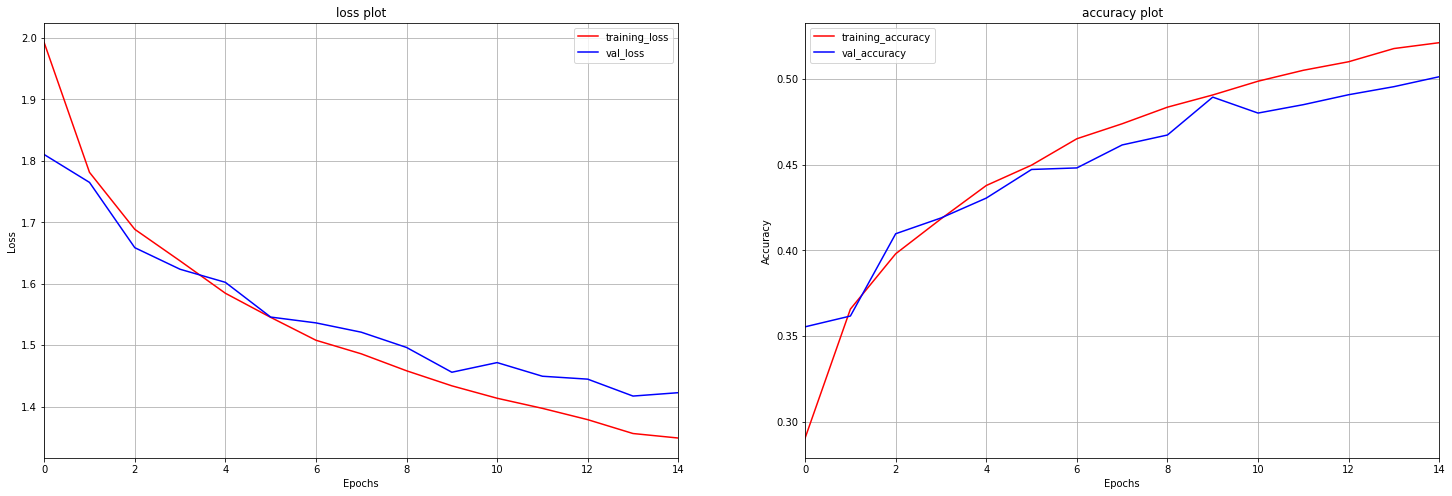

In [ ]:
df2 = pd.DataFrame(hs2.history) 

#vizualising:
df2.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)
fig,ax = plt.subplots(1,2,figsize = (25,8))
df2[['training_loss', 'val_loss']].plot(ax= ax[0],xlim = [0,14],grid = True, title = 'loss plot', xlabel = 'Epochs', ylabel = 'Loss', style = ['r','b']);
df2[['training_accuracy', 'val_accuracy']].plot(ax= ax[1],xlim = [0,14],grid = True, title = 'accuracy plot', xlabel = 'Epochs', ylabel = 'Accuracy', style = ['r','b']);


In [ ]:
#visualizing the first 5 predictions:
y_pred = model2.predict(X_test[:5])
y_pred = y_pred.argmax(axis = -1)


1/1 [==============================] - 0s 43ms/step


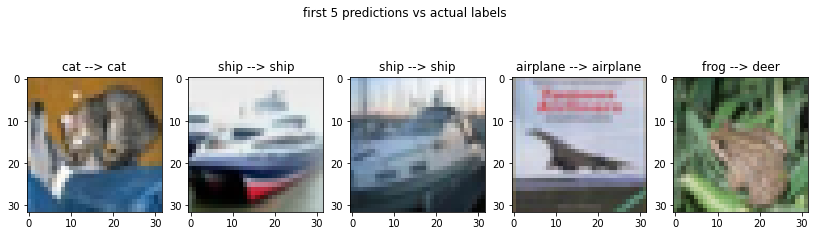

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (14,4))
fig.suptitle('first 5 predictions vs actual labels')
for i in range(5):
  ax[i].imshow(X_test[i].reshape(32,32,3))
  ax[i].set_title(f'{labels[Y_test[i][0]]} --> {labels[y_pred[i]]}')
plt.show()

In [ ]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4225 - accuracy: 0.5013


[1.4225362539291382, 0.5012999773025513]

With two hiddel layers, the model performs with an accuracy of 48.9% which is better than single layer FCNN

## Deep FCNN (5 hiddel layers and 1 output layer)

In [ ]:
model3 = Sequential([
    Dense(1536, input_dim = 3072 , activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(768,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(384,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(192,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(96, activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(10, activation = 'softmax', kernel_initializer = initializers.GlorotNormal())
])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1536)              4720128   
                                                                 
 dense_5 (Dense)             (None, 768)               1180416   
                                                                 
 dense_6 (Dense)             (None, 384)               295296    
                                                                 
 dense_7 (Dense)             (None, 192)               73920     
                                                                 
 dense_8 (Dense)             (None, 96)                18528     
                                                                 
 dense_9 (Dense)             (None, 10)                970       
                                                                 
Total params: 6,289,258
Trainable params: 6,289,258
No

In [ ]:
model3.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [ ]:
hs3 = model3.fit(X_train, Y_train, batch_size = 200 , epochs = 15 , validation_data = (X_test,Y_test))

Epoch 1/15
250/250 [==============================] - 2s 4ms/step - loss: 1.9896 - accuracy: 0.2724 - val_loss: 1.7485 - val_accuracy: 0.3708
Epoch 2/15
250/250 [==============================] - 1s 4ms/step - loss: 1.7182 - accuracy: 0.3802 - val_loss: 1.6526 - val_accuracy: 0.3982
Epoch 3/15
250/250 [==============================] - 1s 4ms/step - loss: 1.6222 - accuracy: 0.4178 - val_loss: 1.5780 - val_accuracy: 0.4340
Epoch 4/15
250/250 [==============================] - 1s 4ms/step - loss: 1.5654 - accuracy: 0.4407 - val_loss: 1.5507 - val_accuracy: 0.4411
Epoch 5/15
250/250 [==============================] - 1s 4ms/step - loss: 1.5092 - accuracy: 0.4596 - val_loss: 1.5258 - val_accuracy: 0.4518
Epoch 6/15
250/250 [==============================] - 1s 4ms/step - loss: 1.4677 - accuracy: 0.4733 - val_loss: 1.4666 - val_accuracy: 0.4825
Epoch 7/15
250/250 [==============================] - 1s 4ms/step - loss: 1.4214 - accuracy: 0.4902 - val_loss: 1.4597 - val_accuracy: 0.4854
Epoch 

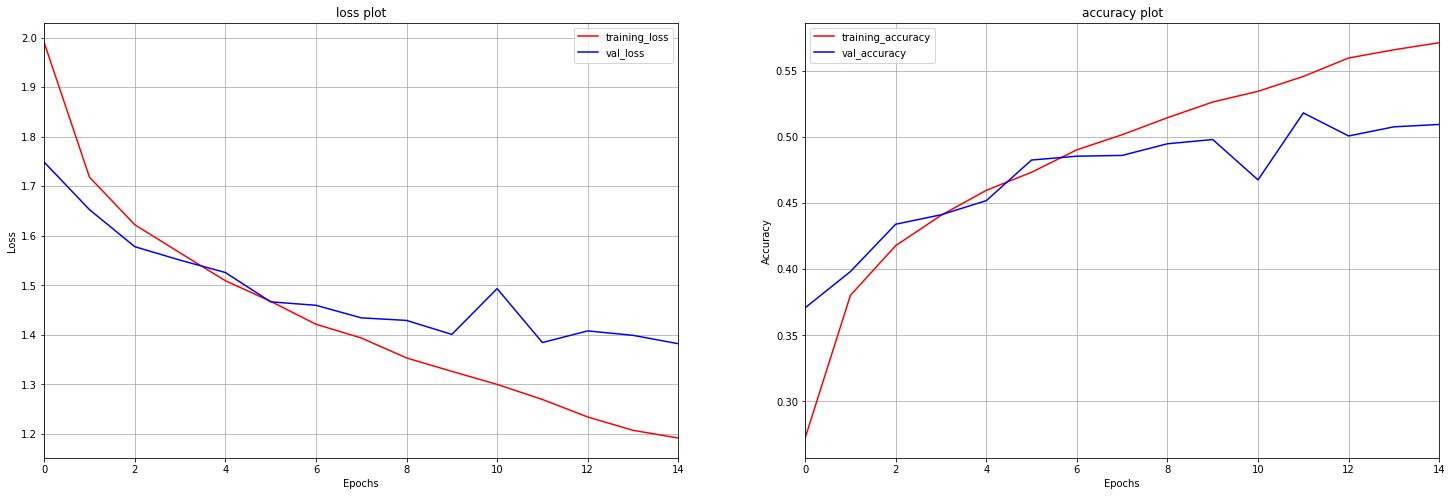

In [ ]:
df3 = pd.DataFrame(hs3.history) 

#vizualising:
df3.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)
fig,ax = plt.subplots(1,2,figsize = (25,8))
df3[['training_loss', 'val_loss']].plot(ax= ax[0],xlim = [0,14],grid = True, title = 'loss plot', xlabel = 'Epochs', ylabel = 'Loss', style = ['r','b']);
df3[['training_accuracy', 'val_accuracy']].plot(ax= ax[1],xlim = [0,14],grid = True, title = 'accuracy plot', xlabel = 'Epochs', ylabel = 'Accuracy', style = ['r','b']);


In [ ]:
#visualizing the first 5 predictions:
y_pred = model3.predict(X_test[:5])
y_pred = y_pred.argmax(axis = -1)


1/1 [==============================] - 0s 58ms/step


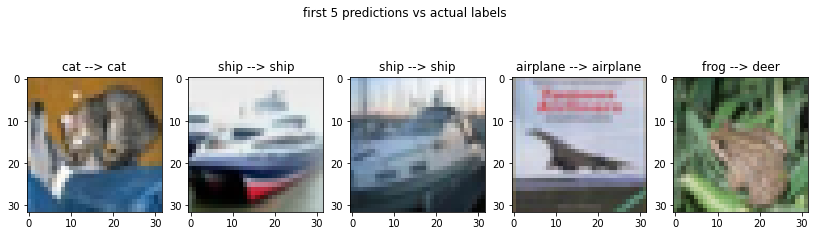

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (14,4))
fig.suptitle('first 5 predictions vs actual labels')
for i in range(5):
  ax[i].imshow(X_test[i].reshape(32,32,3))
  ax[i].set_title(f'{labels[Y_test[i][0]]} --> {labels[y_pred[i]]}')
plt.show()

In [ ]:
model3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3821 - accuracy: 0.5094


[1.3821324110031128, 0.5094000101089478]

The deep FCNN gives an accuracy of 52.2%. The accuracy may improve slightly but this is the limit of an FCNN as it looses the spatial information present in the image. This is reason for needing other models like CNN

## 5 fold Crossvalidation

In all the above methods, we directly used the test data for the validation and for evaluation. But in actuality we split the train data into train and validation data and then do the validation. cross_validation, takes in the train data and based on the K_fold splits the data and does the cross validation. Using this we first tune the hyperparamters. The we finally evaluate the model using the test data.

Let us do the 5 fold cross validation using the just the training data.

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

#defining a funtion to return the model
def build_model():
  model = Sequential([
    Dense(1536, input_dim = 3072 , activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(768,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(384,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(192,activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(96, activation = 'relu', kernel_initializer = initializers.GlorotNormal()),
    Dense(10, activation = 'softmax', kernel_initializer = initializers.GlorotNormal())
  ])
  model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
  )
  return model

classifier = KerasClassifier(model = build_model, batch_size = 200 , epochs = 15)
accuracies = cross_val_score(estimator = classifier , X = X_train, y = Y_train, cv = 5 , n_jobs = -1)



In [ ]:
accuracies

array([0.5145, 0.4972, 0.5187, 0.4891, 0.4922])

In [ ]:
#the mean of 5fold cross validation:
mean_accuracy = accuracies.mean()
std_accuracy  = accuracies.std()

In [ ]:
print('5fold_corss_val_accuracy is :', mean_accuracy)

5fold_corss_val_accuracy is : 0.50234


**Thus the 5fold cross validation accuracy of the deep FCNN is 50.234%**

The dataset we used contained a relaitively small image of size 32 x 32 but the photos taken from mobile phone will be of very large size. This will then massively increase the number of parameters that we need to train. Even if we can solve this problem by applying image compression first, the number of parameters that needs to be trained and stored is very large and will occupy a significant part of the small mobile chips and the storage. 

One way to solve both of these problems is using a cloud based implementation but then we have to rely on internet and that will not be robost enough to be used everywhere (which is needed for our case).